# Question 1

In [11]:
#Importing libraries
    
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [12]:
datahouse = pd.read_csv('kc_house_data.csv') #data import
df = datahouse.copy() #data copy
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [13]:
df.columns  #showing header

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [14]:
df.describe()  #data description

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [15]:
df.isnull().sum().sum() #not missing values

0

 no missing value in our dataset

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

The dataset has 21613 rows, 12 columns
3 of the features are floats and 9 are integers

# Question2

In [17]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 14 , 12 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
   

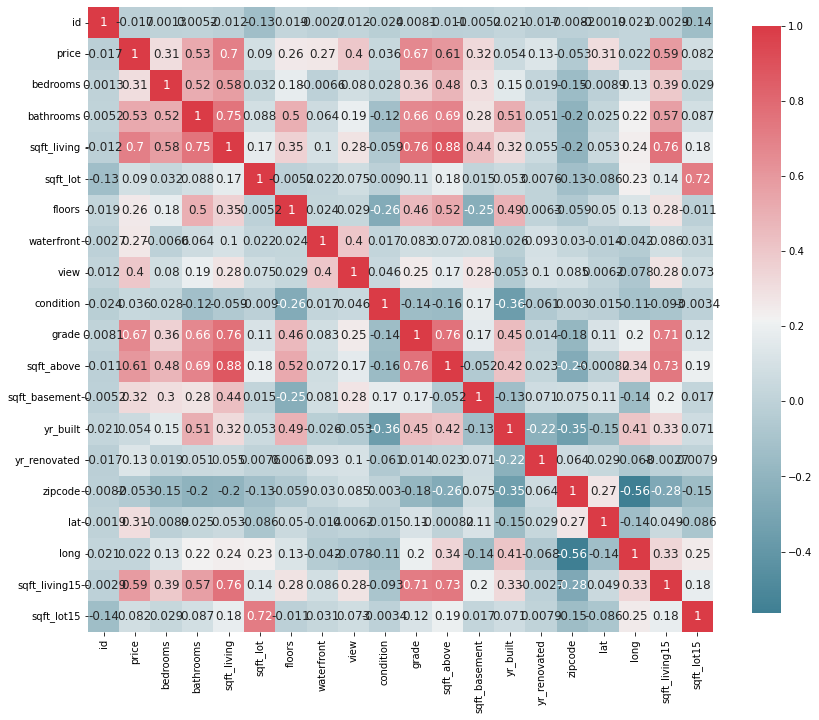

In [18]:
plot_correlation_map(df)

In [19]:
df.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

 #Feature selection
 
This graph shows us how each characteristic is correlated with the target variable (price)

the strongest positive correlations are represented in (pink) and the strongest negative correlations in (blue).

We observe a significant correlation (> 0.5) between these features( sqft_living, grade, sqft_above, sqft_living15, bathroom ) and the price.

We can see that(year_renovated, floors, waterfront, lat, bedrooms, sqft_basement, view) are moderately correlated to price

we can also see (zipcode, id, long, condition, yr_built, sqft_lot15, sqft_lot) are weakly correlated

We decide to keep the features that have a strong correlation and some that have a medium correlation with our target variable (price) in our model

In [20]:
#drop the useless columns

df.drop(columns = ['id', 'zipcode', 'lat', 'long', 'date', 'condition', 'yr_built', 'sqft_lot15', 'sqft_lot'], inplace = True)

In [21]:
#converting float type to int type

df = df.astype(float).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   price          21613 non-null  int32
 1   bedrooms       21613 non-null  int32
 2   bathrooms      21613 non-null  int32
 3   sqft_living    21613 non-null  int32
 4   floors         21613 non-null  int32
 5   waterfront     21613 non-null  int32
 6   view           21613 non-null  int32
 7   grade          21613 non-null  int32
 8   sqft_above     21613 non-null  int32
 9   sqft_basement  21613 non-null  int32
 10  yr_renovated   21613 non-null  int32
 11  sqft_living15  21613 non-null  int32
dtypes: int32(12)
memory usage: 1013.2 KB


# Question 3

In [22]:
#split data

train_data, test_data = train_test_split(df, train_size=0.80, random_state=40)  #splitting data


we splitting the data into 80:20 ratio of which train_size is 80%, test_size is 20%. 

# Question 4

In [34]:
#linear regression

x=train_data["sqft_living"].values[:,np.newaxis]
y=train_data["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=40)

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data

model.fit(x_train,y_train)  #fitting the training data
predicted=model.score(x_train,y_train) #testing our model’s performance
predicted

0.4921895670834676

# Question 5

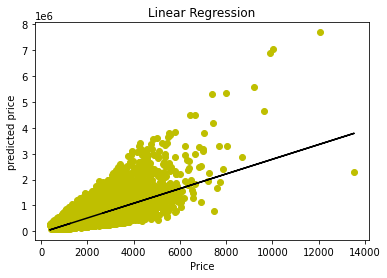

In [36]:
#linear regression plot

plt.scatter(x,y,color="y")
plt.title("Linear Regression")
plt.xlabel("Price")
plt.ylabel("predicted price")
plt.plot(x,model.predict(x),color="k")
plt.show()


# Question 6 

In [25]:
#performance of linear regression

model.fit(x_test,y_test)  #fitting the training data
predicted=model.score(x_test,y_test) #testing our model’s performance
predicted

0.48317414154122973

# Question7

In [57]:
#multi-linear regression

x=df[[ "bedrooms", "bathrooms", "sqft_living",
        "floors", "waterfront", "view","grade",
       "sqft_above", "sqft_basement", "yr_renovated",
       "sqft_living15"]]  #we have more than one input
y=df["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40) #splitting data with test size of 35%

model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data

predicted=model.score(x_train,y_train) #testing our model’s performance
predicted


0.6049735455320937

In [ ]:
#interpretation

we find that multilinear regression is more efficient than simple linear regression because we have several input variables

# Question 8

In [56]:
#Polynomial regression

x=df[[ "bedrooms", "bathrooms", "sqft_living",
        "floors", "waterfront", "view","grade",
       "sqft_above", "sqft_basement", "yr_renovated",
       "sqft_living15"]]  #we have more than one input
y=df["price"].values


model = LinearRegression()
poly = PolynomialFeatures(degree = 2)
x_train_fit = poly.fit_transform(x_train) #transforming our input data
model.fit(x_train_fit, y_train)
x_train = poly.fit_transform(x_train)


predicted=model.score(x_train,y_train) #testing our model’s performance
predicted

0.5496943556315377